**Пример исследования: изучение средней тональности произведений по годам**

Импорт Lensky и требуемых библиотек

In [3]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

In [4]:
df = pd.read_excel('data/RuLitStat.xlsx')
df

,filename,book,author,year,cent,len,len_unique,uniq_words_not_in_pop,mean_freq1k,dost_neu,...,NOUN,NUM,PART,PRON,PROPN,PUNCT,SCONJ,SYM,VERB,X
0,Авдеев.Варенька.1852.txt,Варенька,Авдеев,1852,19,152668,6555,469,759.008835,0.439804,...,0.164474,0.006164,0.055597,0.146570,0.048569,0.264046,0.030311,0.000000,0.167576,0.003809
1,Авдеев.Иванов.1852.txt,Иванов,Авдеев,1852,19,170248,7549,494,702.438997,0.459784,...,0.179738,0.007481,0.047394,0.118560,0.041129,0.246628,0.028709,0.000000,0.164996,0.000663
2,Авдеев.Тетрадь_из_записок_Тамарина.1852.txt,Тетрадь_из_записок_Тамарина,Авдеев,1852,19,154196,6731,491,744.420935,0.415810,...,0.168965,0.006130,0.047310,0.149082,0.033086,0.250108,0.031514,0.000039,0.166451,0.000825
3,Авенариус.Поветрие.1867.txt,Поветрие,Авенариус,1867,19,256336,12694,705,747.801066,0.489591,...,0.211074,0.007128,0.058478,0.110938,0.035516,0.311703,0.022050,0.000000,0.157011,0.009298
4,Авенариус.Современная_идиллия.1867.txt,Современная_идиллия,Авенариус,1867,19,305536,13909,923,748.249222,0.535464,...,0.196245,0.007834,0.060576,0.103942,0.036025,0.319947,0.027060,0.000000,0.157280,0.019945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,Ясинский.Верочка.1887.txt,Верочка,Ясинский,1887,19,119630,6392,348,749.065562,0.445304,...,0.197364,0.006226,0.040210,0.136920,0.037823,0.283958,0.025112,0.000000,0.178842,0.001608
751,Ясинский.Учитель.1888.txt,Учитель,Ясинский,1888,19,121856,6295,375,795.539469,0.487984,...,0.198243,0.005270,0.042263,0.131646,0.057556,0.263136,0.026608,0.000000,0.179695,0.000258
752,Яхина.Дети_мои.2018.txt,Дети_мои,Яхина,2018,21,780736,31275,2996,737.782698,0.447696,...,0.275472,0.007331,0.039981,0.041392,0.037842,0.239701,0.018335,0.000000,0.156017,0.000793
753,Яхина.Зулейха_открывает_глаза.2015.txt,Зулейха_открывает_глаза,Яхина,2015,21,712961,27269,2767,699.971191,0.503221,...,0.267870,0.008460,0.037172,0.049176,0.042556,0.287307,0.016902,0.000000,0.164584,0.001254


Возьмем нужные столбцы

In [5]:
cols = ['year', 'dost_neg', 'dost_pos']
df = df[cols].sort_values(by='year')
df

,year,dost_neg,dost_pos
700,1782,0.097513,0.054868
533,1790,0.152137,0.044189
272,1792,0.097750,0.119606
271,1792,0.141277,0.124906
273,1802,0.137417,0.083253
...,...,...,...
464,2022,0.138012,0.054655
565,2022,0.154550,0.035621
608,2022,0.114538,0.071756
262,2023,0.123399,0.033623


Вычислим тональность как разность позитивной и негатичной лексики

In [6]:
df['ton'] = df['dost_pos']-df['dost_neg']
df = df.drop(['dost_pos', 'dost_neg'], axis=1)
df

,year,ton
700,1782,-0.042645
533,1790,-0.107948
272,1792,0.021856
271,1792,-0.016370
273,1802,-0.054163
...,...,...
464,2022,-0.083357
565,2022,-0.118929
608,2022,-0.042782
262,2023,-0.089776


Построим промежутки для подсчета среднего

In [7]:
years = list(range(1800, 2041, 30))
years

[1800, 1830, 1860, 1890, 1920, 1950, 1980, 2010, 2040]

In [8]:
tons = []
quant = []
for i in range(1, len(years)):
    res = df[(df['year'] > years[i-1]) & (df['year'] < years[i])]['ton']
    quant.append(len(res))
    tons.append(res.mean())

Средние тональности

In [9]:
tons

[-0.08753144481035327,
 -0.07251487074248766,
 -0.09055512409566012,
 -0.08882269500216156,
 -0.09584017087413776,
 -0.09815563285822396,
 -0.09327335792760218,
 -0.0909777224688214]

Количество произведений в каждом отрезке (края не очень статистически надежны, но закономерности в середине списка 1820-2020 могут быть статистически значимы)

In [10]:
quant

[10, 143, 198, 139, 53, 47, 88, 47]

Построение графика

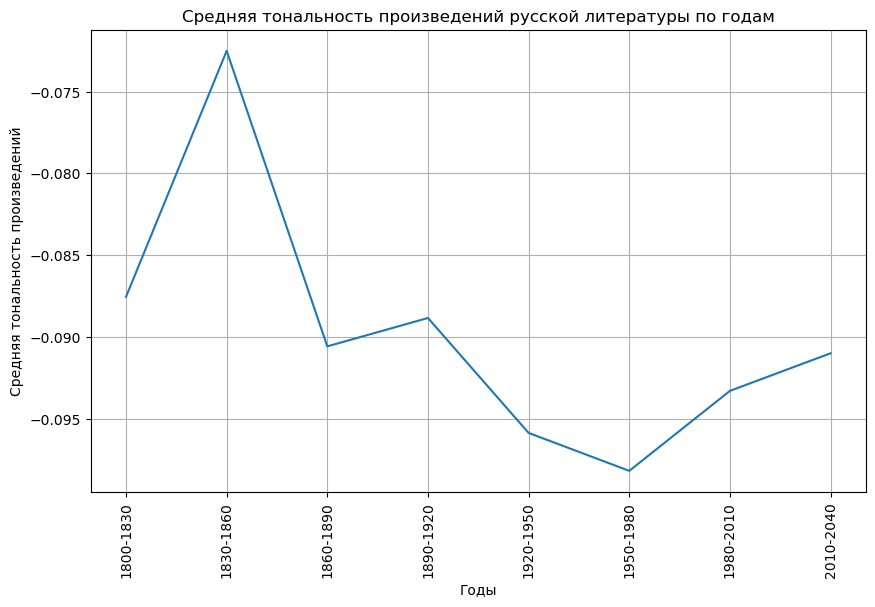

In [11]:
from matplotlib.pyplot import figure
figure(figsize=(10, 6), dpi=100)
plt.plot(tons)
plt.xticks(range(len(years)-1), [f'{years[i-1]}-{years[i]}' for i in range(1, len(years))], rotation=90)
plt.xlabel('Годы')
plt.ylabel('Средняя тональность произведений')
plt.title('Средняя тональность произведений русской литературы по годам')
plt.grid()